by using the area of the square(C) and the circle(S) we want to calculate pi.

pi = 4 * S/C

# Import the necessary modules 

In [1]:
import torch
import math
import matplotlib.pyplot as plt

Generate a square with points. (-1 < x < 1, -1 < y < 1)

In [2]:
n_point = 1000
points = torch.rand((n_point, 2)) * 2 - 1

A point falls within the circle if the distance is less than 1.

In [3]:
n_point_circle = 0
points_circle = []
for point in points:
  r = torch.sqrt(point[0] ** 2 + point[1] ** 2)
  if r <= 1:
    points_circle.append(point)
    n_point_circle += 1
points_circle = torch.stack(points_circle)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


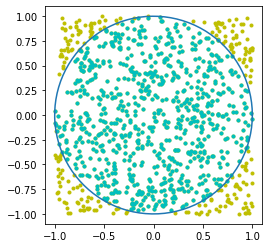

In [23]:
plt.plot(points[:, 0].numpy(), points[:, 1].numpy(), 'y.')
plt.plot(points_circle[:, 0].numpy(), points_circle[:,1].numpy(), 'c.')
i = torch.linspace(0, 2 * math.pi, steps=100)
plt.plot(torch.cos(i).numpy(), torch.sin(i).numpy())
plt.axes().set_aspect('equal')
plt.show()

In [20]:
pi_estimated = 4 * (n_point_circle / n_point)
print('Estimated value of pi is:', pi_estimated)

Estimated value of pi is: 3.1


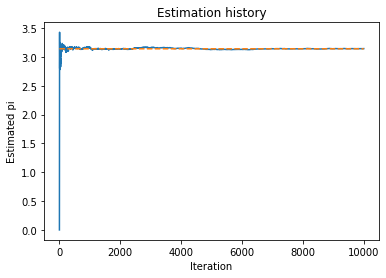

Estimated value of pi is: 3.1444


In [21]:
def estimate_pi_mc(n_iteration):
  n_point_circle = 0
  pi_iteration = []
  for i in range(1, n_iteration+1):
    point = torch.rand(2) * 2 - 1
    r = torch.sqrt(point[0] ** 2 + point[1] ** 2)
    if r <= 1:
      n_point_circle += 1
    pi_iteration.append(4 * (n_point_circle / i))
  plt.plot(pi_iteration)
  plt.plot([math.pi] * n_iteration, '--')
  plt.xlabel('Iteration')
  plt.ylabel('Estimated pi')
  plt.title('Estimation history')
  plt.show()
  print('Estimated value of pi is:', pi_iteration[-1])


estimate_pi_mc(10000)